In [1]:
import numpy as np
import math 
from K_cercha import K_cerchaGlobal

In [2]:
# DATOS SECCIÓN
E = 210e6      #[kPa] = 200 [GPa]
A = 0.05*0.02  #[m]^2

# Variables auxiliares para creación de la malla
r1 = 1.0
r2 = 1.2

t0 = 0
t1 = 90/4
t2 = 45
t3 = 3*90/4
t4 = 90

In [3]:
nodosPolares = np.array([
    [r1,t4],
    [r2,t3],
    [r1,t2],
    [r2,t1],
    [r1,t0],
    [r2,t4],
    [r1,t3],
    [r2,t2],
    [r1,t1],
    [r2,t0]
])

In [4]:
nodos = []

for nodo in nodosPolares: 

    x = nodo[0]*math.cos(nodo[1]*math.pi/180) 
    y = nodo[0]*math.sin(nodo[1]*math.pi/180) 
    
    c = [x,y] 
    
    nodos.append(c) 
    
nodos = np.array(nodos)

In [5]:
restricciones = np.array([
    [1,1],
    [0,0],
    [0,0],
    [0,0],
    [1,1],
    [1,0],
    [0,0],
    [0,0],
    [0,0],
    [1,0]
])

In [6]:
rest_DoF = restricciones.flatten()
print(rest_DoF)

[1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0]


In [7]:
rest_index = np.where(rest_DoF != 0)[0]
free_index = np.where(rest_DoF == 0)[0]

print(np.where(rest_DoF != 0))

(array([ 0,  1,  8,  9, 10, 18]),)


In [10]:
elementos = np.array([
    [1,7],
    [1,6],
    [6,2],
    [6,7],
    [5,10],
    [4,10],
    [5,4],
    [9,5],
    [9,4],
    [8,4],
    [8,9],
    [3,9],
    [2,8],
    [3,8],
    [2,3],
    [2,7],
    [7,3]
])

n_nodos = len(nodos)
n_elem  = len(elementos)

DoF = n_nodos*2

In [14]:
theta = [] #Lista que almacenará la inclinación de cada elemento
L = [] # Lista que almacenará la longitud de cada elemento

K_elem = [] 

i = 0
for elem in elementos:
    
    ni = elem[0] # índice de nodo inicial
    nj = elem[1] # Índice de nodo final

    # Corrección de índice. Los arreglos en python inician en 0
    ni = ni - 1
    nj = nj - 1

    # Extracción de coordenadas nodo inicial
    xi = nodos[ni][0]
    yi = nodos[ni][1]

    # Extracción de coordenadas nodo final
    xj = nodos[nj][0]
    yj = nodos[nj][1] 

    theta.append(math.atan2(yj-yi,xj-xi))      # Pone el valor calculado del ángulo al final de la lista.
    L.append(math.sqrt((xj-xi)**2+(yj-yi)**2)) # Pone el valor calculado de la longitud al final de la lista.

    K_elem.append(K_cerchaGlobal(theta[i], E, A, L[i])) #Cálculo y almacenamiento de matriz de rigidez global por elemento.
    
    i=i+1


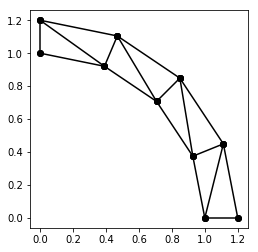

In [16]:
from plot_Struct1D import plot_2D_Truss
plot_2D_Truss(nodos, elementos)

In [34]:
K = np.zeros([DoF,DoF]) #Inicialización de la matriz de rigidez global de la estructura.

# https://realpython.com/python-enumerate/
# When you use enumerate(), the function gives you back two loop variables:
#   1. The count of the current iteration (i)
#   2. The value of the item at the current iteration (elem)

for e, elem in enumerate(elementos): 

    ni = elem[0] # índice de nodo inicial
    nj = elem[1] # Índice de nodo final

    # Corrección de índice. Los arreglos en python inician en 0
    ni = ni - 1
    nj = nj - 1

    # Extracción de coordenadas
    xi = nodos[ni][0]
    yi = nodos[ni][1]

    xj = nodos[nj][0]
    yj = nodos[nj][1]

    inicialI = 2*ni
    finalI = 2*ni + 1

    inicialJ = 2*nj
    finalJ = 2*nj + 1

    K[inicialI:finalI+1,inicialI:finalI+1] = K[inicialI:finalI+1,inicialI:finalI+1] +  K_elem[e][0:2,0:2]
    K[inicialJ:finalJ+1,inicialJ:finalJ+1] += K_elem[e][2:4,2:4]

    K[inicialI:finalI+1,inicialJ:finalJ+1] += K_elem[e][0:2,2:4]
    K[inicialJ:finalJ+1,inicialI:finalI+1] += K_elem[e][2:4,0:2]

print(K)

[[ 5.05730799e+05 -1.02892094e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.93686943e-27 -6.42939570e-11
  -5.05730799e+05  1.02892094e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.02892094e+05  1.07093363e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.42939570e-11 -1.05000000e+06
   1.02892094e+05 -2.09336331e+04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.01667824e+06 -1.20494458e+05
  -1.19752285e+05  1.99813345e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.21442333e+05  8.57434117e+04
  -1.60304356e+05 -3.77653395e+05 -3.15179263e+05  2.12591097e+05
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00

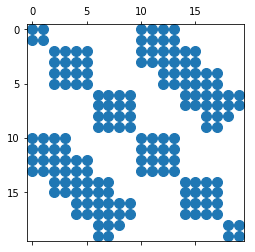

In [20]:
K[0:2,0:2] = K_elem[0][0:2,0:2]
K[3:5,3:5] = K_elem[0][0:2,0:2]

Knn = [[K[i][j] for j in free_index] for i in free_index]
Kaa = [[K[i][j] for j in rest_index] for i in rest_index]
Kan = [[K[i][j] for j in rest_index] for i in free_index]

Knn = np.matrix(Knn)
Kaa = np.matrix(Kaa)
Kan = np.matrix(Kan)
Kna = Kan.transpose()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.spy(K, marker='o')
plt.show()
